Importing nessesary packages

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

First we will load the D31 dataset

In [180]:
data = []
file = open("./data/D31.txt")
for line in file:
    data_point = line.split()
    for i in range(0, len(data_point)):
        data_point[i] = float(data_point[i])
    data_point_rounded = np.round(data_point, 1)
    data.append(data_point_rounded[:-1])

min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data)

Let's visualize the dataset

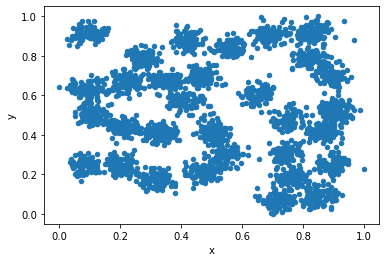

In [181]:
df = pd.DataFrame(data_normalized, columns=['x', 'y'])
ax1 = df.plot.scatter(x='x',
                     y='y')
plt.show()

In [182]:
# function to calculate euclidian distance
def calculate_euc_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

# function to calculate manhatten distance. used to get closest neigours
def man_distance(node1_row, node1_col, node2_row, node2_col):
  return np.abs(node1_row-node2_row) + np.abs(node1_col-node2_col)

def winning_node(data, data_index, som_map, map_rows, map_cols):
    node = (0,0)
    smallest_dist = 1000000
    for i in range(map_rows):
        for j in range(map_cols):
            euc_dist = calculate_euc_distance(som_map[i][j], data[data_index])
            if euc_dist < smallest_dist:
                smallest_dist = euc_dist
                node = (i, j)
    return node

def neighbourhood_kernal(distance, nhood_size):
    return np.exp(-(pow(distance, 2) / 2 * pow(nhood_size, 2)))


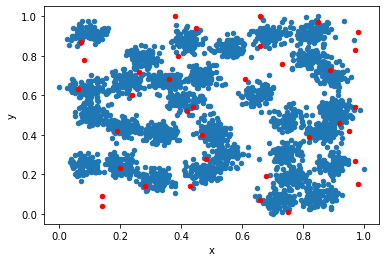

In [183]:
# define SOM row and col size
Rows = 6
Cols = 6
# create a 10x10 SOM with 2D nodes with a random value between 0-1
map = np.random.random_sample(size=(Rows,Cols,2))

initial_weights = []
for row in range(Rows):
    for col in range(Cols):
        weight = np.ndarray.round(map[row][col], decimals=2)
        initial_weights.append(weight)


map_df = pd.DataFrame(initial_weights, columns=['x', 'y'])
first_plot = df.plot.scatter(x='x', y='y')
map_df.plot.scatter(x='x', y='y', ax=first_plot, c='red')
# som_df.plot.line(x=0, y=1, ax=ax2, style='b')
plt.show()

Train the network

In [184]:
epochs = 5000
max_neighbourhood_size = 12
max_learning_rate = 0.5

for e in range(epochs):
    # calculate neighbourhood decrease and reduce
    neighbourhood_size = max_neighbourhood_size * np.exp(-e / epochs)
    # calculate learning rate decrease and r__reduce
    learning_rate = max_learning_rate * np.exp( -e / epochs)

    # choose random index from input data list
    index = np.random.randint(len(data_normalized))
    # get winning node
    winning_node_row, winning_node_col = winning_node(data_normalized, index, map, Rows, Cols)
    # update w of the winning node and neighbours
    for row in range(Rows):
        for col in range(Cols):
            distance_between_nodes = man_distance(winning_node_row, winning_node_col, row, col)
            if distance_between_nodes < neighbourhood_size:
                neighbourhood_kernal_val = neighbourhood_kernal(distance_between_nodes, neighbourhood_size)
                # updating weights of nodes
                map[row][col] = map[row][col] + learning_rate * neighbourhood_kernal_val * (data_normalized[index] - map[row][col])


print("SOM training completed")
print(map)


SOM training completed
[[[0.870106   0.43143266]
  [0.56483588 0.30432863]
  [0.85164751 0.24592692]
  [0.08765694 0.60593384]
  [0.20065354 0.26438065]
  [0.75592491 0.48916378]]

 [[0.69856422 0.91924235]
  [0.40589936 0.5699616 ]
  [0.36710064 0.67427797]
  [0.71274032 0.09258428]
  [0.20237369 0.65787784]
  [0.41623246 0.85376834]]

 [[0.4686793  0.21452281]
  [0.66013685 0.59198055]
  [0.41366214 0.89395307]
  [0.21400487 0.42700877]
  [0.30550251 0.16318881]
  [0.09582528 0.90747294]]

 [[0.75402691 0.17389974]
  [0.75813625 0.32818015]
  [0.90667707 0.27086614]
  [0.83576158 0.78655045]
  [0.90422333 0.52912922]
  [0.32476066 0.40378278]]

 [[0.85217262 0.9509251 ]
  [0.08099714 0.23829957]
  [0.88629793 0.69823902]
  [0.12163631 0.49065758]
  [0.8401013  0.08458971]
  [0.27052528 0.78188374]]

 [[0.94974212 0.81785573]
  [0.83439015 0.88443822]
  [0.48951286 0.4309041 ]
  [0.13562517 0.03862765]
  [0.55997893 0.84517165]
  [0.46269407 0.69374061]]]


       x     y
0   0.87  0.43
1   0.56  0.30
2   0.85  0.25
3   0.09  0.61
4   0.20  0.26
5   0.76  0.49
6   0.70  0.92
7   0.41  0.57
8   0.37  0.67
9   0.71  0.09
10  0.20  0.66
11  0.42  0.85
12  0.47  0.21
13  0.66  0.59
14  0.41  0.89
15  0.21  0.43
16  0.31  0.16
17  0.10  0.91
18  0.75  0.17
19  0.76  0.33
20  0.91  0.27
21  0.84  0.79
22  0.90  0.53
23  0.32  0.40
24  0.85  0.95
25  0.08  0.24
26  0.89  0.70
27  0.12  0.49
28  0.84  0.08
29  0.27  0.78
30  0.95  0.82
31  0.83  0.88
32  0.49  0.43
33  0.14  0.04
34  0.56  0.85
35  0.46  0.69


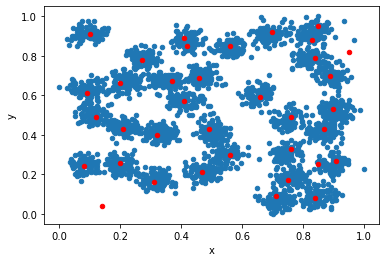

In [185]:
weights = []
for row in range(Rows):
    for col in range(Cols):
        weight = np.ndarray.round(map[row][col], decimals=2)
        weights.append(weight)


som_df = pd.DataFrame(weights, columns=['x', 'y'])
print(som_df)

first_plot = df.plot.scatter(x='x', y='y')
som_df.plot.scatter(x='x', y='y', ax=first_plot, c='red')
# som_df.plot.line(x=0, y=1, ax=ax2, style='b')
plt.show()

